## Lab 4: Kernel PCA
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Exercise 1
Use the ```data_kPCA_2022-2023.txt``` and ```labels_kPCA_2022-2023.txt``` uploaded in the ```Datasets``` folder. The first file contains the variables describing the data, while the second one contains the labels of the classes associated to it. 

In [2]:
X = np.genfromtxt("../Datasets/data_kPCA_2022-2023.txt")
y = np.genfromtxt("../Datasets/labels_kPCA_2022-2023.txt")

In [3]:
X[0]

array([ 0.04844007, -0.60572772, -0.80645532, -0.08903856, -0.17378475,
        2.07630058,  0.31362153, -0.06046345,  0.05887964,  0.22173653,
        0.13930395,  0.03023198,  0.07705471,  0.91082847, -0.0054627 ,
       -0.74890782, -0.47269468, -0.37255482,  0.26545015,  0.49544782])

In [4]:
y[0]

1.0

- Apply **your own** implementation of PCA to the dataset and plot the eigenvalue spectum.

In [5]:
X = (X-X.mean())/X.std()

In [6]:
from sklearn.decomposition import PCA
#as per the previous labs, here we'll use the sklearn version

In [7]:
pca = PCA()
X_new = pca.fit_transform(X)

- Project the data in the first two principal components and color by class. 

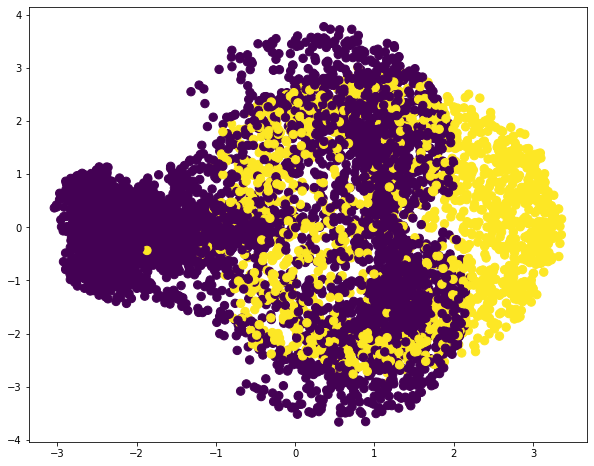

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X_new[:,0], X_new[:,1], c=y, s=70)

- Implement your own version of Kernel PCA. 
- Apply Kernel PCA to the dataset. Test both a Gaussian kernel with width $\sigma \in [0.05, 2.0]$ and a polynomial kernel varying the value of $\delta \in \mathbf{N}$. 

Note: use the second version of the polynomial kernel introduced in class (the one with "$1 + \dots$")

- Plot the transformed data in 2d and 3d for the different kernels.

In [9]:
from sklearn.decomposition import KernelPCA

In [10]:
kpca=KernelPCA()
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’} or callable, default=’linear’

Looking at the documentation we find the following: 
- *RBF (Radial Basis Function) kernel*: $k(x,y)=\exp(-\gamma ||x-y||^2)$. If $\gamma = \sigma^{-2}$ it is known as the Gaussian kernel of variance $\sigma^2$.


- *Polynomial kernel* : $k(x,y)=(\gamma x^T y +c_0)^d$ with $d$ the degree of the kernel. If $c_0=0$ the kernel is said to be homogeneous.

Let us consider the appropriate parameters for the ```rbf ``` and ```poly ``` kernels in the  ```sklearn ``` implementation.

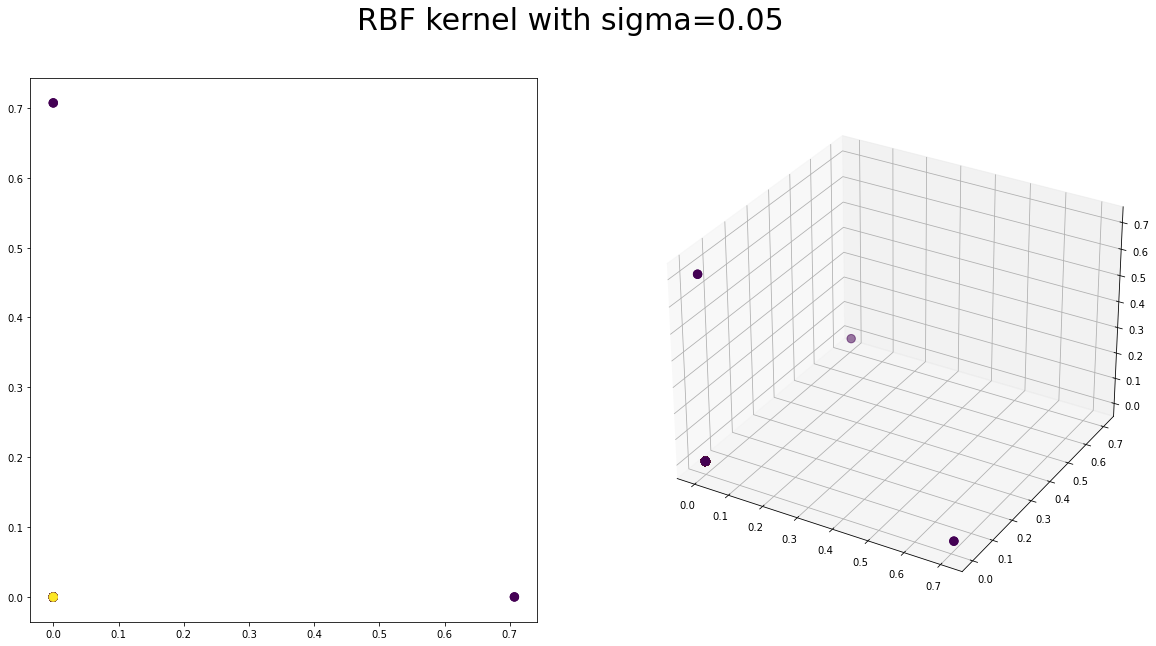

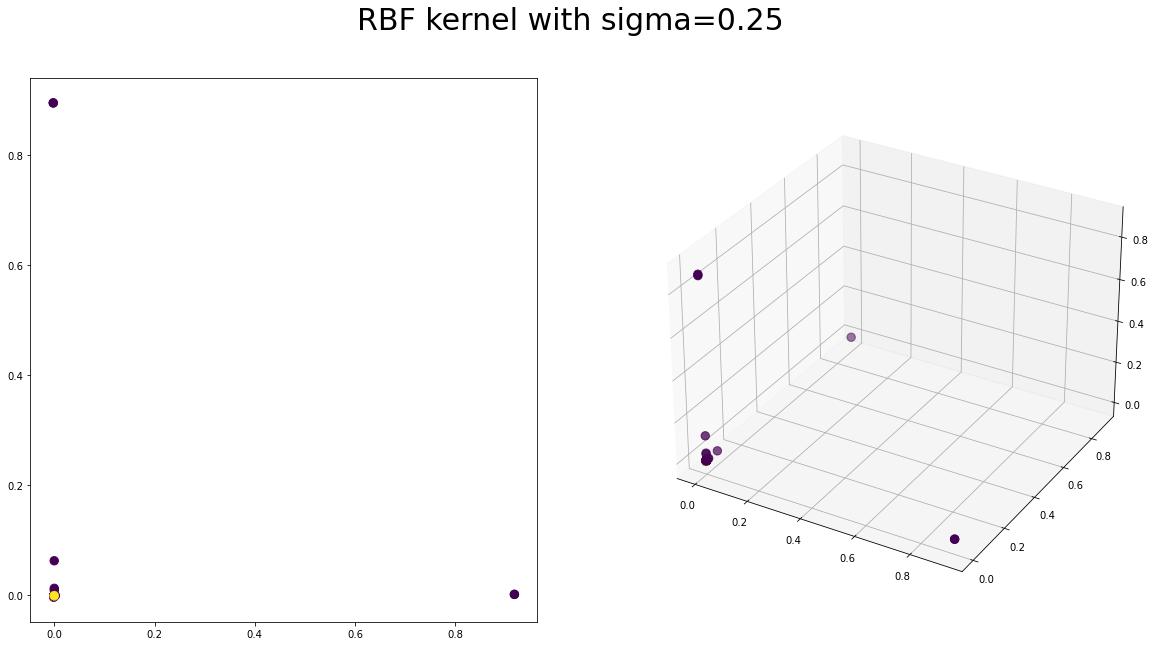

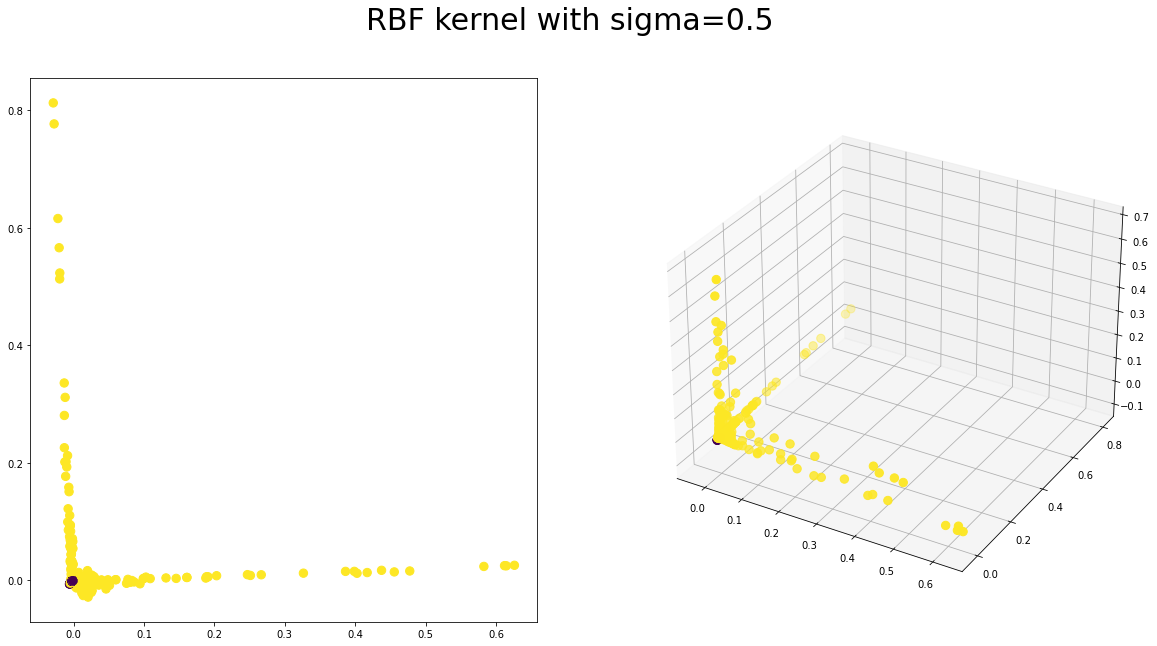

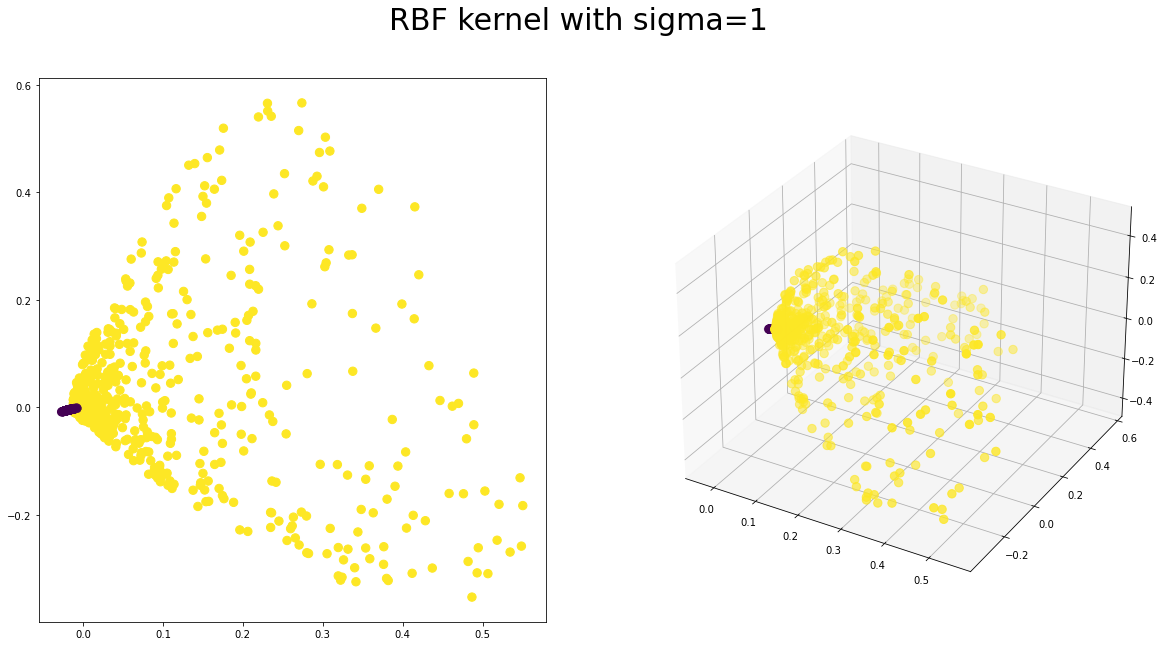

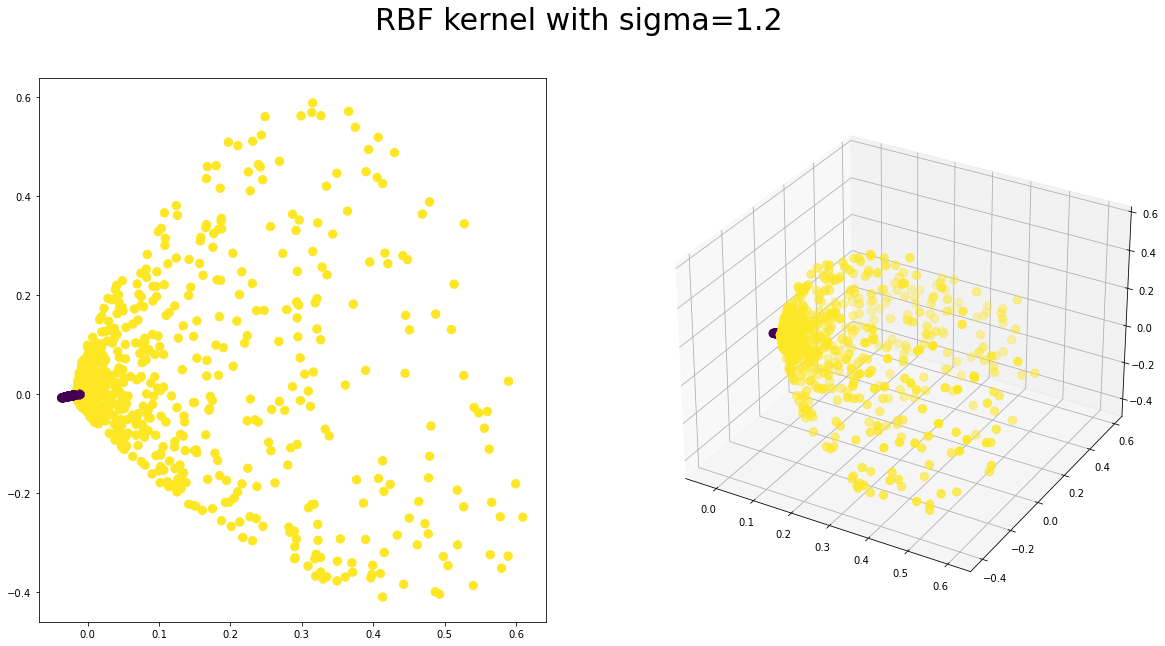

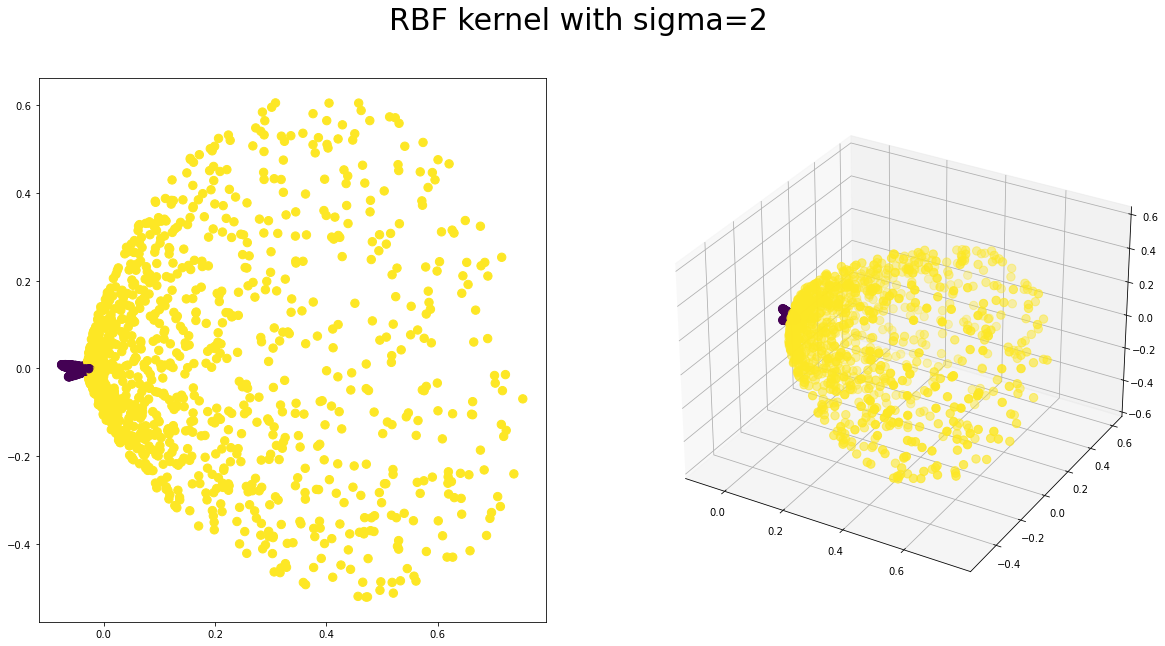

In [11]:
for sigma in (0.05, 0.25, 0.5, 1, 1.2, 2):
    kpca = KernelPCA(n_components =3, kernel='rbf', gamma=(sigma)**(-2))
    #k(x,y)= -(||x-y||^2)/(sigma^2)
    X_new = kpca.fit_transform(X)
    
    
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(f"RBF kernel with sigma={sigma}", fontsize=30)
    ax = fig.add_subplot(1,2,1)
    ax.scatter(X_new[:,0], X_new[:,1], c=y, s=70)
    
    ax = fig.add_subplot(1,2,2, projection='3d')
    ax.scatter3D(X_new[:,0], X_new[:,1], X_new[:,2], c=y, s=70)
    plt.show()

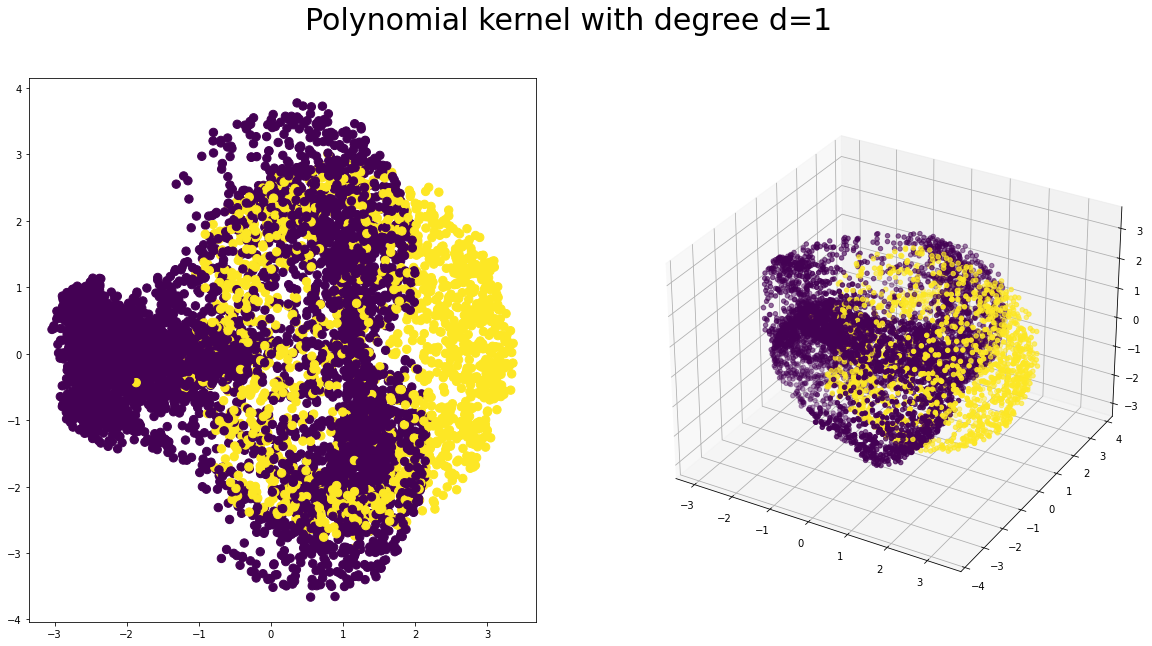

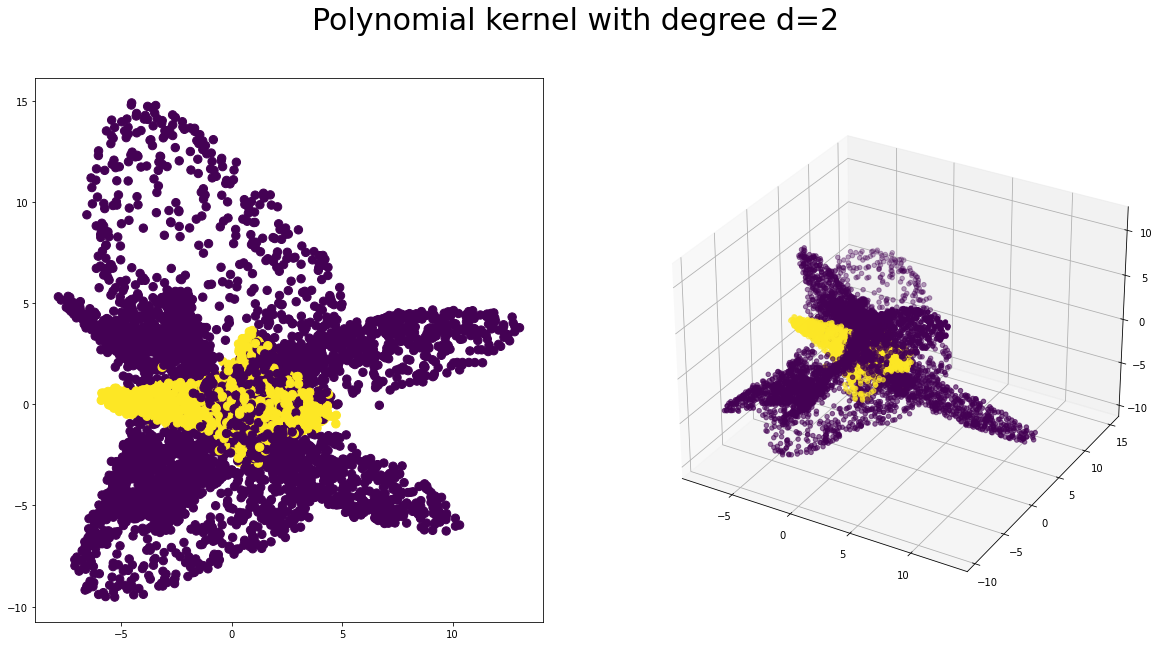

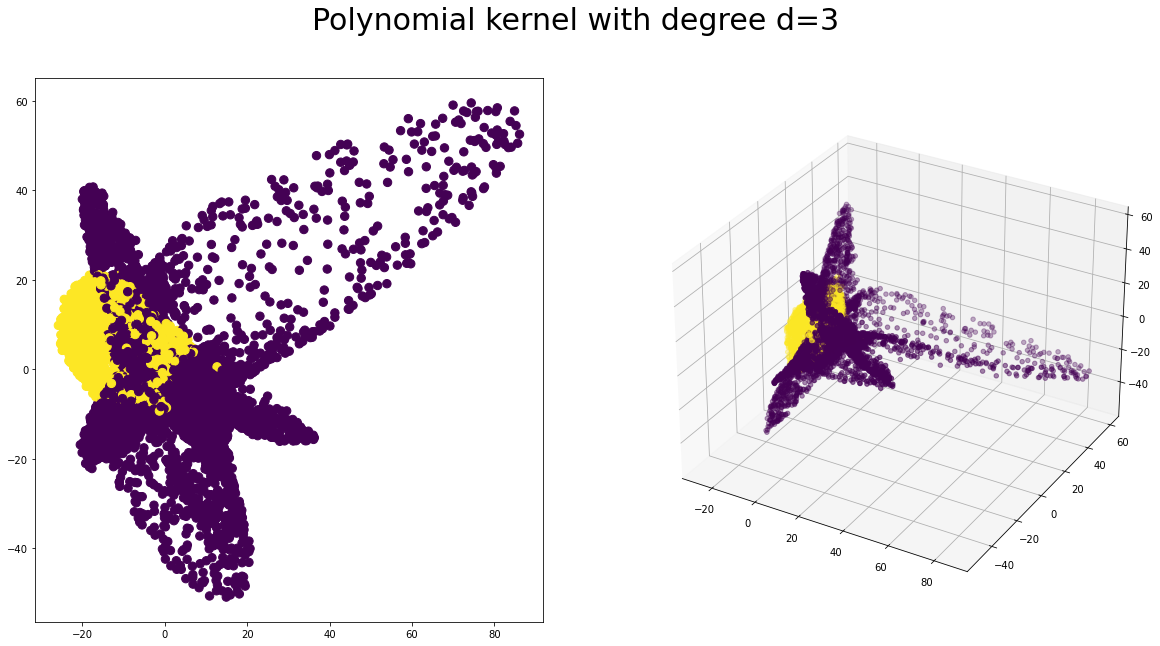

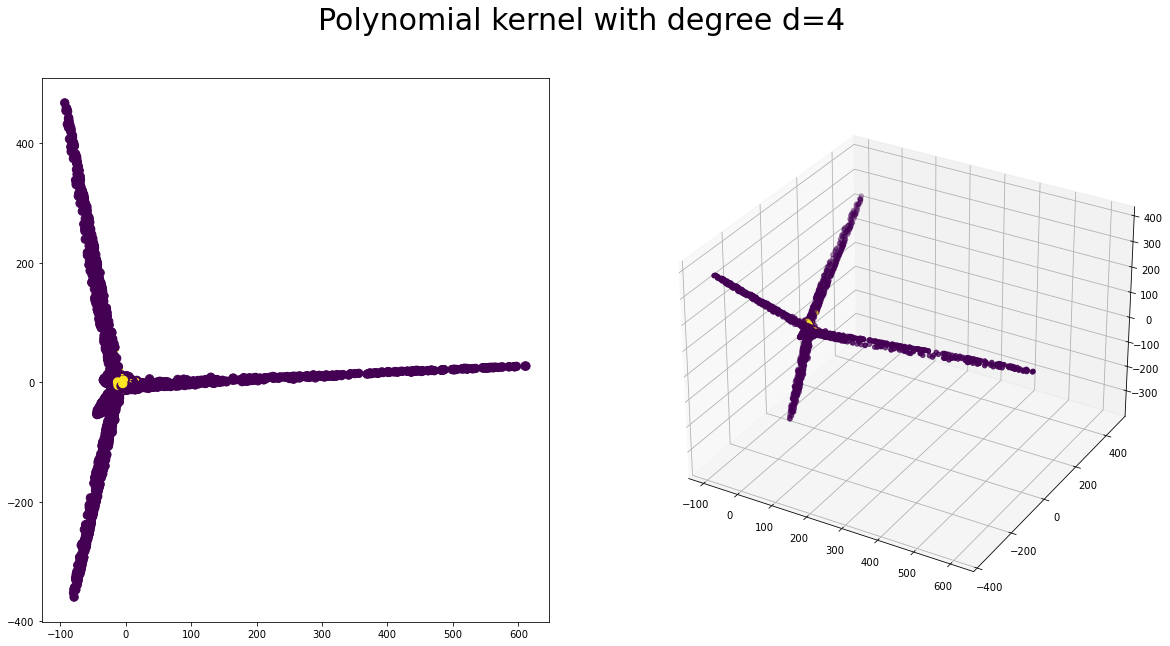

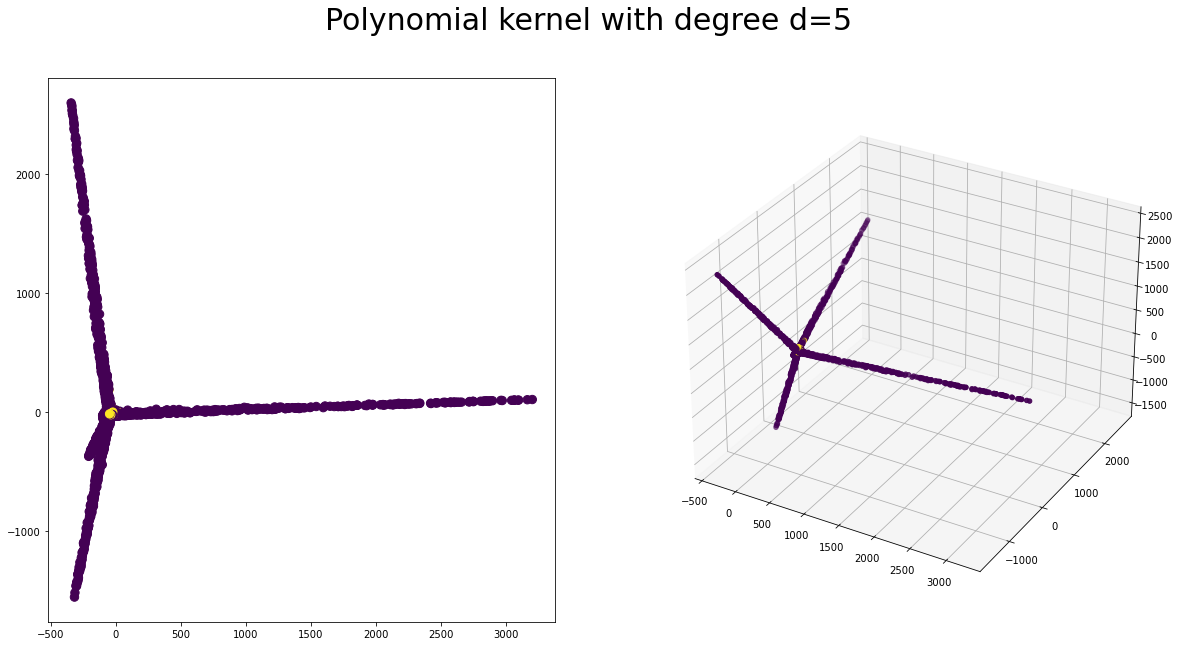

In [12]:
for delta in (1,2,3,4,5):
    kpca = KernelPCA(n_components =3, kernel='poly', degree=delta, gamma=1, coef0=1)
    #k(x,y)=((x^T)y +1)^d
    X_new = kpca.fit_transform(X)
    
    
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(f"Polynomial kernel with degree d={delta}", fontsize=30)
    ax = fig.add_subplot(1,2,1)
    ax.scatter(X_new[:,0], X_new[:,1], c=y, s=70)
    
    ax = fig.add_subplot(1,2,2, projection='3d')
    ax.scatter3D(X_new[:,0], X_new[:,1], X_new[:,2], c=y)
    plt.show()